# Analisis de serie de tiempo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficar_serie(df, obs='', titulo=''):

    # Crear una figura y un eje
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    if type(df) == pd.DataFrame:
        # Graficar la serie de tiempo
        ax.plot(df.index, df[obs], marker='', linestyle='-', color='b', label=obs)
    else:
        df = df.to_frame(name=obs) 
        ax.plot(df.index, df[obs], marker='', linestyle='-', color='b', label=obs)
    # Dibujar solo N=10 marcas temporales (en caso de tener series de tiempo)
    # con demasiadas marcas
    n_ticks = 10
    locator = mdates.AutoDateLocator(maxticks=n_ticks)
    ax.xaxis.set_major_locator(locator)
    

    # Rotar los ticks 45°
    plt.xticks(rotation=45)
    
    # Etiquetas ejes horizontal y vertical
    plt.xlabel('Tiempo')
    plt.ylabel(obs)
    plt.title(titulo)
    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def graficar_series_todas(df, titulo='Series de tiempo'):
    # Crear una figura y ejes para cada variable
    num_vars = df.shape[1]
    fig, axes = plt.subplots(num_vars, 1, figsize=(12, 6 * num_vars), sharex=False)
    if num_vars == 1:
        axes = [axes]  # Asegurarse de que axes sea iterable si hay solo una variable
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        # Graficar la serie de tiempo
        ax.plot(df.index, df[col], marker='', linestyle='-', label=col)
        
        # Dibujar solo N=10 marcas temporales (en caso de tener series de tiempo)
        n_ticks = 10
        locator = mdates.AutoDateLocator(maxticks=n_ticks)
        ax.xaxis.set_major_locator(locator)
        
        # Formatear las fechas
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        
        # Etiquetas ejes horizontal y vertical
        ax.set_ylabel(col)
        ax.set_title(f'{titulo} - {col}')
        
        # Rotar los ticks 45°
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlabel('Tiempo')

    plt.tight_layout(pad=3.0)
    plt.show()

## Importación de los datos

In [3]:
ruta = r'C:\Users\manug\Desktop\Data Science\DataSets\Proyecto clima\\'

In [4]:
df = pd.read_csv(ruta + 'weather_sbgl.csv', parse_dates=['valid_time_gmt'], index_col = ['valid_time_gmt'])

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df

day_ind  temp  icon_extd      wx_phrase  dewPt  \
valid_time_gmt                                                       
1999-01-01 00:00:00       N  79.0       2700  Mostly Cloudy   77.0   
1999-01-01 01:00:00       N  79.0       2700  Mostly Cloudy   77.0   
1999-01-01 02:00:00       N  79.0       2700  Mostly Cloudy   79.0   
1999-01-01 03:00:00       N  79.0       2700  Mostly Cloudy   79.0   
1999-01-01 04:00:00       N  79.0       2700  Mostly Cloudy   77.0   
...                     ...   ...        ...            ...    ...   
2024-07-26 16:00:00       D  84.0       3400           Fair   59.0   
2024-07-26 17:00:00       D  79.0       3400           Fair   61.0   
2024-07-26 18:00:00       N  75.0       3300           Fair   59.0   
2024-07-26 19:00:00       N  75.0       3300           Fair   57.0   
2024-07-26 20:00:00       N  72.0       3300           Fair   57.0   

                     heat_index     rh  pressure  vis    wc   wdir  \
valid_time_gmt                                                       
1999-01-01 00:00:00        83.0   94.0     29.83  6.0  79.0  360.0   
1999-01-01 01:00:00        83.0   94.0     29.83  3.0  79.0  360.0   
1999-01-01 02:00:00        83.0  100.0     29.80  2.0  79.0   70.0   
1999-01-01 03:00:00        83.0  100.0     29.80  3.0  79.0  330.0   
1999-01-01 04:00:00        83.0   94.0     29.77  4.0  79.0   30.0   
...                         ...    ...       ...  ...   ...    ...   
2024-07-26 16:00:00        84.0   42.0     30.01  6.0  84.0  110.0   
2024-07-26 17:00:00        80.0   54.0     30.01  6.0  79.0  130.0   
2024-07-26 18:00:00        75.0   57.0     30.01  6.0  75.0  140.0   
2024-07-26 19:00:00        75.0   53.0     30.04  6.0  75.0  130.0   
2024-07-26 20:00:00        72.0   60.0     30.04  6.0  72.0   90.0   

                    wdir_cardinal  wspd  feels_like  uv_index  
valid_time_gmt                                                 
1999-01-01 00:00:00             N   1.0        83.0       0.0  
1999-01-01 01:00:00             N   3.0        83.0       0.0  
1999-01-01 02:00:00           ENE   6.0        83.0       0.0  
1999-01-01 03:00:00           NNW   5.0        83.0       0.0  
1999-01-01 04:00:00           NNE   3.0        83.0       0.0  
...                           ...   ...         ...       ...  
2024-07-26 16:00:00           ESE   5.0        84.0       1.0  
2024-07-26 17:00:00            SE   9.0        80.0       0.0  
2024-07-26 18:00:00            SE   9.0        75.0       0.0  
2024-07-26 19:00:00            SE   7.0        75.0       0.0  
2024-07-26 20:00:00             E   5.0        72.0       0.0  

[239106 rows x 15 columns]

## Tratamiento de valores nulos

In [7]:
df.index.isna().sum()

0

In [8]:
rango_fechas = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
rango_fechas

DatetimeIndex(['1999-01-01 00:00:00', '1999-01-01 01:00:00',
               '1999-01-01 02:00:00', '1999-01-01 03:00:00',
               '1999-01-01 04:00:00', '1999-01-01 05:00:00',
               '1999-01-01 06:00:00', '1999-01-01 07:00:00',
               '1999-01-01 08:00:00', '1999-01-01 09:00:00',
               ...
               '2024-07-26 11:00:00', '2024-07-26 12:00:00',
               '2024-07-26 13:00:00', '2024-07-26 14:00:00',
               '2024-07-26 15:00:00', '2024-07-26 16:00:00',
               '2024-07-26 17:00:00', '2024-07-26 18:00:00',
               '2024-07-26 19:00:00', '2024-07-26 20:00:00'],
              dtype='datetime64[ns]', length=224133, freq='H')

In [9]:
len(rango_fechas.difference(df.index))

6129

In [10]:
df.index.duplicated().sum()

1556

In [11]:
df_clean = df[~df.index.duplicated()]

In [12]:
df_clean.index.duplicated().sum()

0

In [13]:
df_clean = df_clean.reindex(rango_fechas)

In [14]:
df_clean

day_ind  temp  icon_extd      wx_phrase  dewPt  \
1999-01-01 00:00:00       N  79.0     2700.0  Mostly Cloudy   77.0   
1999-01-01 01:00:00       N  79.0     2700.0  Mostly Cloudy   77.0   
1999-01-01 02:00:00       N  79.0     2700.0  Mostly Cloudy   79.0   
1999-01-01 03:00:00       N  79.0     2700.0  Mostly Cloudy   79.0   
1999-01-01 04:00:00       N  79.0     2700.0  Mostly Cloudy   77.0   
...                     ...   ...        ...            ...    ...   
2024-07-26 16:00:00       D  84.0     3400.0           Fair   59.0   
2024-07-26 17:00:00       D  79.0     3400.0           Fair   61.0   
2024-07-26 18:00:00       N  75.0     3300.0           Fair   59.0   
2024-07-26 19:00:00       N  75.0     3300.0           Fair   57.0   
2024-07-26 20:00:00       N  72.0     3300.0           Fair   57.0   

                     heat_index     rh  pressure  vis    wc   wdir  \
1999-01-01 00:00:00        83.0   94.0     29.83  6.0  79.0  360.0   
1999-01-01 01:00:00        83.0   94.0     29.83  3.0  79.0  360.0   
1999-01-01 02:00:00        83.0  100.0     29.80  2.0  79.0   70.0   
1999-01-01 03:00:00        83.0  100.0     29.80  3.0  79.0  330.0   
1999-01-01 04:00:00        83.0   94.0     29.77  4.0  79.0   30.0   
...                         ...    ...       ...  ...   ...    ...   
2024-07-26 16:00:00        84.0   42.0     30.01  6.0  84.0  110.0   
2024-07-26 17:00:00        80.0   54.0     30.01  6.0  79.0  130.0   
2024-07-26 18:00:00        75.0   57.0     30.01  6.0  75.0  140.0   
2024-07-26 19:00:00        75.0   53.0     30.04  6.0  75.0  130.0   
2024-07-26 20:00:00        72.0   60.0     30.04  6.0  72.0   90.0   

                    wdir_cardinal  wspd  feels_like  uv_index  
1999-01-01 00:00:00             N   1.0        83.0       0.0  
1999-01-01 01:00:00             N   3.0        83.0       0.0  
1999-01-01 02:00:00           ENE   6.0        83.0       0.0  
1999-01-01 03:00:00           NNW   5.0        83.0       0.0  
1999-01-01 04:00:00           NNE   3.0        83.0       0.0  
...                           ...   ...         ...       ...  
2024-07-26 16:00:00           ESE   5.0        84.0       1.0  
2024-07-26 17:00:00            SE   9.0        80.0       0.0  
2024-07-26 18:00:00            SE   9.0        75.0       0.0  
2024-07-26 19:00:00            SE   7.0        75.0       0.0  
2024-07-26 20:00:00             E   5.0        72.0       0.0  

[224133 rows x 15 columns]

In [15]:
df_num = df_clean.select_dtypes('number')

In [16]:
df_num

temp  icon_extd  dewPt  heat_index     rh  pressure  vis  \
1999-01-01 00:00:00  79.0     2700.0   77.0        83.0   94.0     29.83  6.0   
1999-01-01 01:00:00  79.0     2700.0   77.0        83.0   94.0     29.83  3.0   
1999-01-01 02:00:00  79.0     2700.0   79.0        83.0  100.0     29.80  2.0   
1999-01-01 03:00:00  79.0     2700.0   79.0        83.0  100.0     29.80  3.0   
1999-01-01 04:00:00  79.0     2700.0   77.0        83.0   94.0     29.77  4.0   
...                   ...        ...    ...         ...    ...       ...  ...   
2024-07-26 16:00:00  84.0     3400.0   59.0        84.0   42.0     30.01  6.0   
2024-07-26 17:00:00  79.0     3400.0   61.0        80.0   54.0     30.01  6.0   
2024-07-26 18:00:00  75.0     3300.0   59.0        75.0   57.0     30.01  6.0   
2024-07-26 19:00:00  75.0     3300.0   57.0        75.0   53.0     30.04  6.0   
2024-07-26 20:00:00  72.0     3300.0   57.0        72.0   60.0     30.04  6.0   

                       wc   wdir  wspd  feels_like  uv_index  
1999-01-01 00:00:00  79.0  360.0   1.0        83.0       0.0  
1999-01-01 01:00:00  79.0  360.0   3.0        83.0       0.0  
1999-01-01 02:00:00  79.0   70.0   6.0        83.0       0.0  
1999-01-01 03:00:00  79.0  330.0   5.0        83.0       0.0  
1999-01-01 04:00:00  79.0   30.0   3.0        83.0       0.0  
...                   ...    ...   ...         ...       ...  
2024-07-26 16:00:00  84.0  110.0   5.0        84.0       1.0  
2024-07-26 17:00:00  79.0  130.0   9.0        80.0       0.0  
2024-07-26 18:00:00  75.0  140.0   9.0        75.0       0.0  
2024-07-26 19:00:00  75.0  130.0   7.0        75.0       0.0  
2024-07-26 20:00:00  72.0   90.0   5.0        72.0       0.0  

[224133 rows x 12 columns]

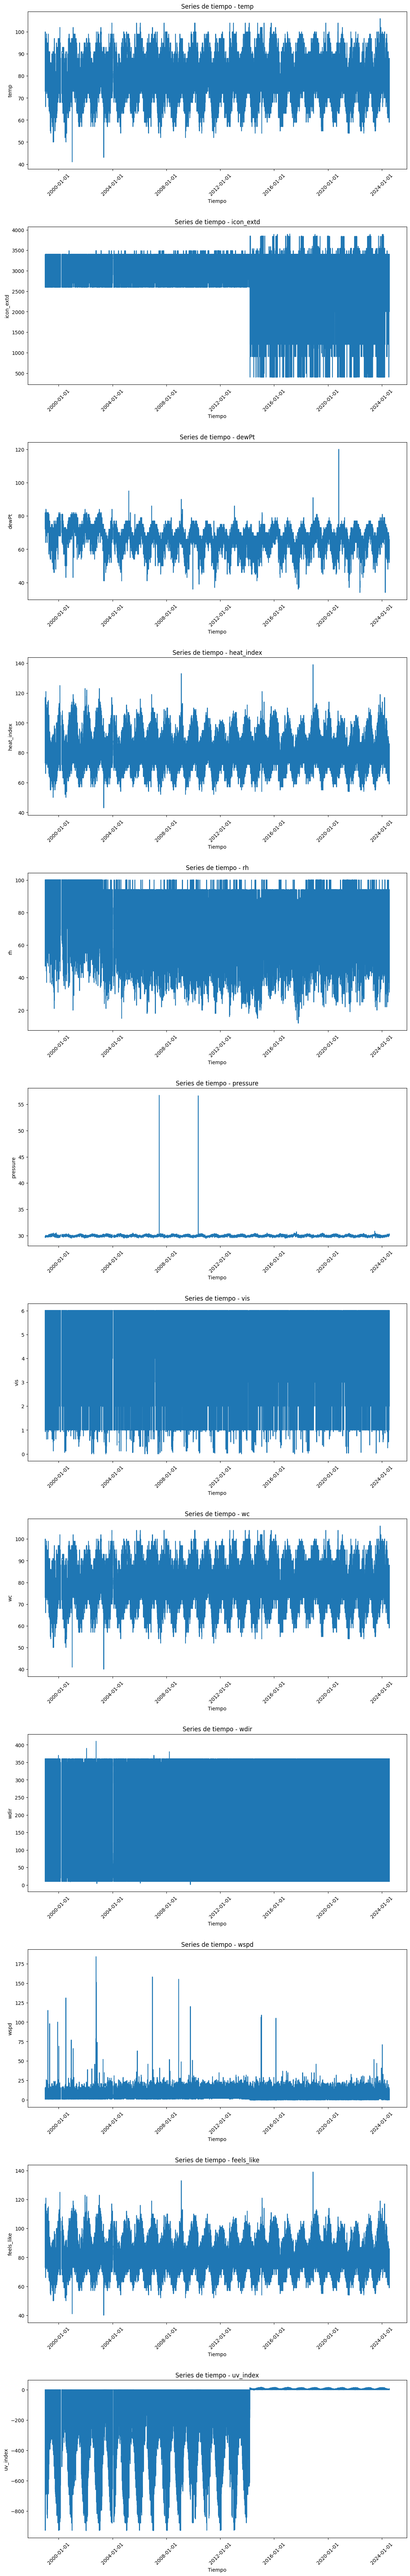

In [17]:
graficar_series_todas(df_num)

In [18]:
df_clean[df_clean.temp.isna()]

day_ind  temp  icon_extd wx_phrase  dewPt  heat_index  rh  \
1999-01-06 03:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
1999-01-06 12:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
1999-01-06 13:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
1999-01-07 16:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
1999-01-07 23:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
...                     ...   ...        ...       ...    ...         ...  ..   
2023-09-08 07:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
2023-09-08 08:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
2023-09-08 09:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
2023-09-08 10:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   
2024-05-28 16:00:00     NaN   NaN        NaN       NaN    NaN         NaN NaN   

                     pressure  vis  wc  wdir wdir_cardinal  wspd  feels_like  \
1999-01-06 03:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
1999-01-06 12:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
1999-01-06 13:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
1999-01-07 16:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
1999-01-07 23:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
...                       ...  ...  ..   ...           ...   ...         ...   
2023-09-08 07:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
2023-09-08 08:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
2023-09-08 09:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
2023-09-08 10:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   
2024-05-28 16:00:00       NaN  NaN NaN   NaN           NaN   NaN         NaN   

                     uv_index  
1999-01-06 03:00:00       NaN  
1999-01-06 12:00:00       NaN  
1999-01-06 13:00:00       NaN  
1999-01-07 16:00:00       NaN  
1999-01-07 23:00:00       NaN  
...                       ...  
2023-09-08 07:00:00       NaN  
2023-09-08 08:00:00       NaN  
2023-09-08 09:00:00       NaN  
2023-09-08 10:00:00       NaN  
2024-05-28 16:00:00       NaN  

[6411 rows x 15 columns]

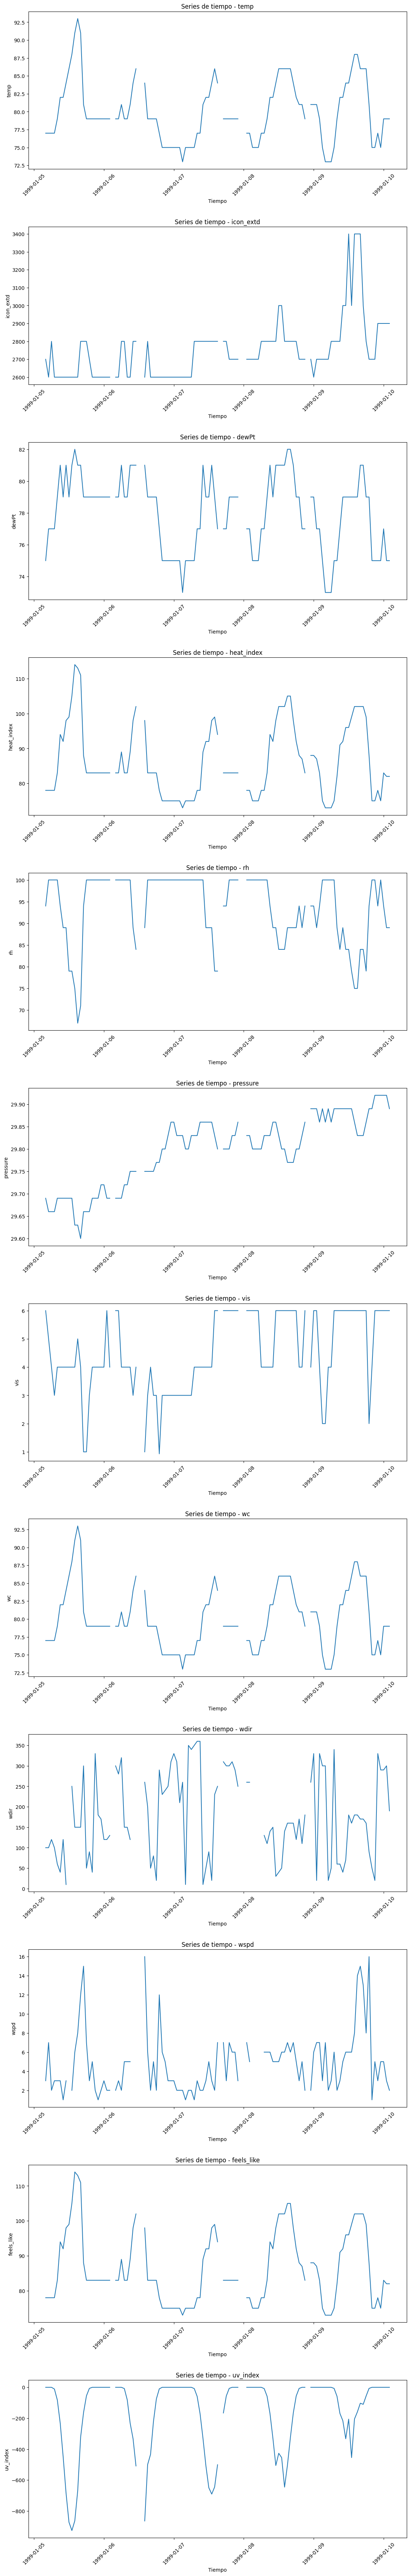

In [19]:
graficar_series_todas(df_num[(df_clean.index > '1999-01-05 03:00:00') & (df_num.index < '1999-01-10 03:00:00')])

In [20]:
df_num_ffill = df_num

In [21]:
variables_to_fill =['temp', 'dewPt', 'heat_index', 'pressure', 'wc', 'feels_like']
for variable in variables_to_fill:
    df_num_ffill[variable] = df_num_ffill[variable].ffill()

In [22]:
df_num.isna().sum().sort_values(ascending = False)

wdir          18676
wspd          15176
rh             6671
uv_index       6143
icon_extd      6129
vis            6129
temp              0
dewPt             0
heat_index        0
pressure          0
wc                0
feels_like        0
dtype: int64

In [23]:
df_num.columns

Index(['temp', 'icon_extd', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis',
       'wc', 'wdir', 'wspd', 'feels_like', 'uv_index'],
      dtype='object')

In [24]:
from statsmodels.imputation.mice import MICEData
import statsmodels.api as sm

In [25]:
mice_data = MICEData(df_num_ffill)
mice_data.data

temp  icon_extd  dewPt  heat_index     rh  pressure  vis    wc   wdir  \
0       79.0     2700.0   77.0        83.0   94.0     29.83  6.0  79.0  360.0   
1       79.0     2700.0   77.0        83.0   94.0     29.83  3.0  79.0  360.0   
2       79.0     2700.0   79.0        83.0  100.0     29.80  2.0  79.0   70.0   
3       79.0     2700.0   79.0        83.0  100.0     29.80  3.0  79.0  330.0   
4       79.0     2700.0   77.0        83.0   94.0     29.77  4.0  79.0   30.0   
...      ...        ...    ...         ...    ...       ...  ...   ...    ...   
224128  84.0     3400.0   59.0        84.0   42.0     30.01  6.0  84.0  110.0   
224129  79.0     3400.0   61.0        80.0   54.0     30.01  6.0  79.0  130.0   
224130  75.0     3300.0   59.0        75.0   57.0     30.01  6.0  75.0  140.0   
224131  75.0     3300.0   57.0        75.0   53.0     30.04  6.0  75.0  130.0   
224132  72.0     3300.0   57.0        72.0   60.0     30.04  6.0  72.0   90.0   

        wspd  feels_like  uv_index  
0        1.0        83.0       0.0  
1        3.0        83.0       0.0  
2        6.0        83.0       0.0  
3        5.0        83.0       0.0  
4        3.0        83.0       0.0  
...      ...         ...       ...  
224128   5.0        84.0       1.0  
224129   9.0        80.0       0.0  
224130   9.0        75.0       0.0  
224131   7.0        75.0       0.0  
224132   5.0        72.0       0.0  

[224133 rows x 12 columns]

In [26]:
# Lista de variables a imputar
variables = ['temp', 'icon_extd', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis',
             'wc', 'wdir', 'wspd', 'feels_like', 'uv_index']

In [27]:
# Configurar el imputador para cada variable con valores nulos
for var in variables:
    formula = ' + '.join([v for v in variables if v != var])
    mice_data.set_imputer(var, formula=formula, model_class=sm.OLS)

In [28]:
mice_data.update_all(n_iter = 10)

In [29]:
mice_data.data.isna().sum()

temp          0
icon_extd     0
dewPt         0
heat_index    0
rh            0
pressure      0
vis           0
wc            0
wdir          0
wspd          0
feels_like    0
uv_index      0
dtype: int64

In [30]:
df_mice = mice_data.data

In [31]:
df_mice = df_mice.set_index(rango_fechas)

In [32]:
df_mice

temp  icon_extd  dewPt  heat_index     rh  pressure  vis  \
1999-01-01 00:00:00  79.0     2700.0   77.0        83.0   94.0     29.83  6.0   
1999-01-01 01:00:00  79.0     2700.0   77.0        83.0   94.0     29.83  3.0   
1999-01-01 02:00:00  79.0     2700.0   79.0        83.0  100.0     29.80  2.0   
1999-01-01 03:00:00  79.0     2700.0   79.0        83.0  100.0     29.80  3.0   
1999-01-01 04:00:00  79.0     2700.0   77.0        83.0   94.0     29.77  4.0   
...                   ...        ...    ...         ...    ...       ...  ...   
2024-07-26 16:00:00  84.0     3400.0   59.0        84.0   42.0     30.01  6.0   
2024-07-26 17:00:00  79.0     3400.0   61.0        80.0   54.0     30.01  6.0   
2024-07-26 18:00:00  75.0     3300.0   59.0        75.0   57.0     30.01  6.0   
2024-07-26 19:00:00  75.0     3300.0   57.0        75.0   53.0     30.04  6.0   
2024-07-26 20:00:00  72.0     3300.0   57.0        72.0   60.0     30.04  6.0   

                       wc   wdir  wspd  feels_like  uv_index  
1999-01-01 00:00:00  79.0  360.0   1.0        83.0       0.0  
1999-01-01 01:00:00  79.0  360.0   3.0        83.0       0.0  
1999-01-01 02:00:00  79.0   70.0   6.0        83.0       0.0  
1999-01-01 03:00:00  79.0  330.0   5.0        83.0       0.0  
1999-01-01 04:00:00  79.0   30.0   3.0        83.0       0.0  
...                   ...    ...   ...         ...       ...  
2024-07-26 16:00:00  84.0  110.0   5.0        84.0       1.0  
2024-07-26 17:00:00  79.0  130.0   9.0        80.0       0.0  
2024-07-26 18:00:00  75.0  140.0   9.0        75.0       0.0  
2024-07-26 19:00:00  75.0  130.0   7.0        75.0       0.0  
2024-07-26 20:00:00  72.0   90.0   5.0        72.0       0.0  

[224133 rows x 12 columns]

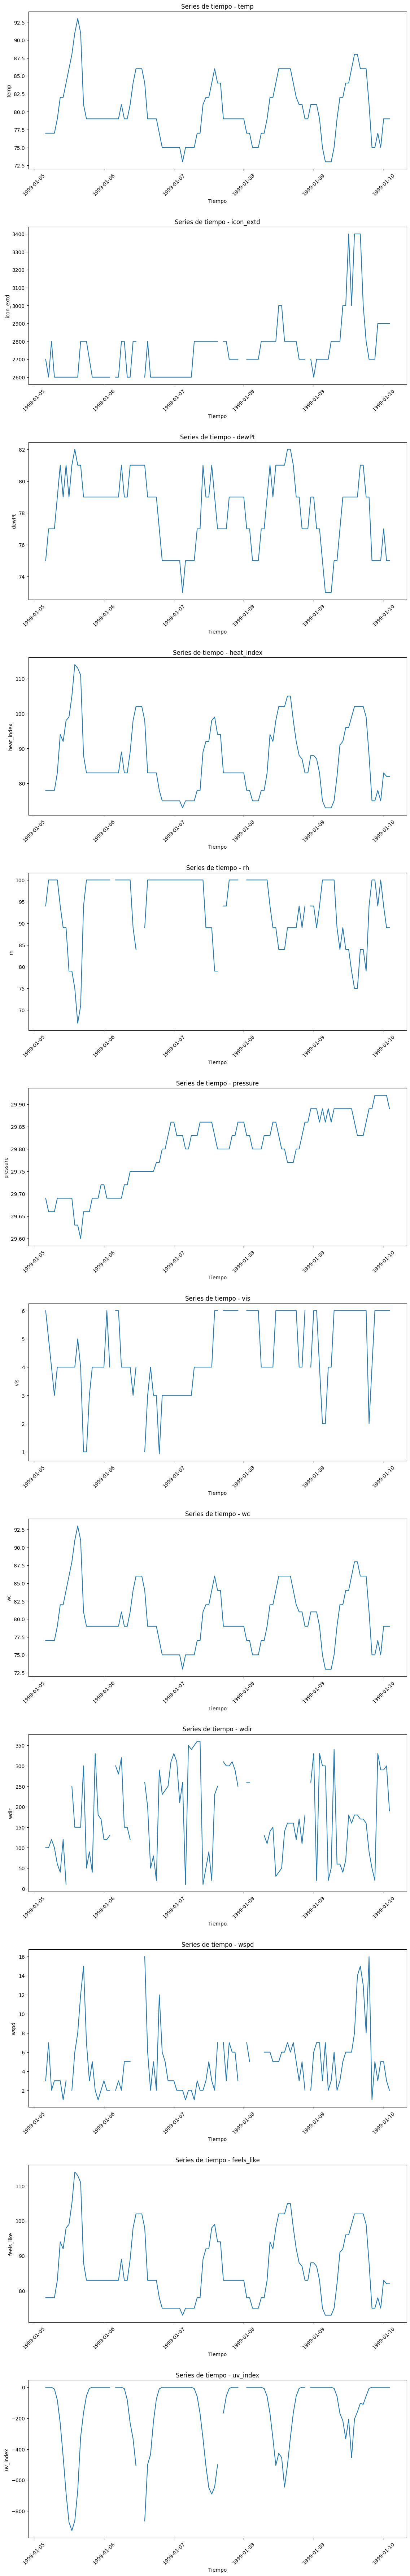

In [33]:
graficar_series_todas(df_num[(df_num.index > '1999-01-05 03:00:00') & (df_num.index < '1999-01-10 03:00:00')])

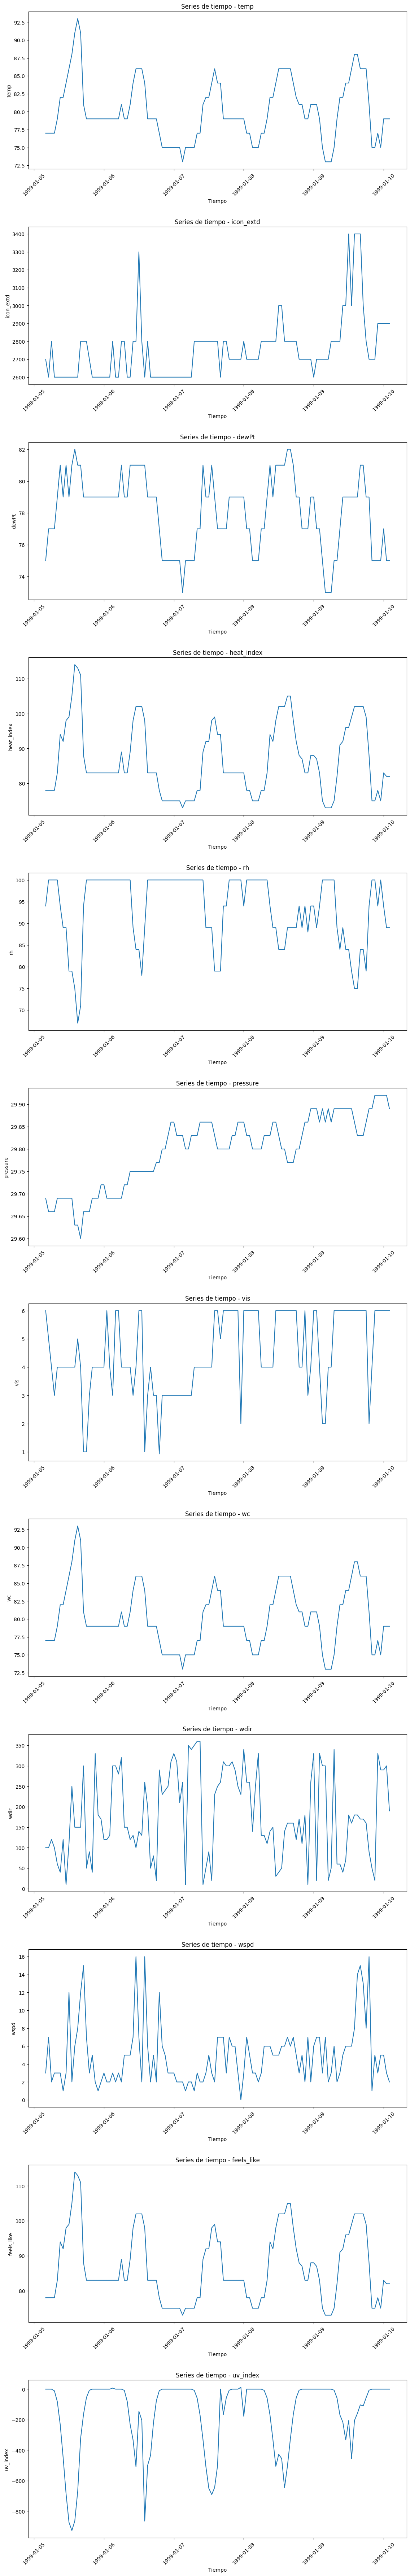

In [34]:
graficar_series_todas(df_mice[(df_mice.index > '1999-01-05 03:00:00') & (df_mice.index < '1999-01-10 03:00:00')])

In [35]:
df_mice.isna().sum()

temp          0
icon_extd     0
dewPt         0
heat_index    0
rh            0
pressure      0
vis           0
wc            0
wdir          0
wspd          0
feels_like    0
uv_index      0
dtype: int64

## Tratamiento de valores atipicos

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df):
    # Filtrar solo las columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    
    # Número de columnas numéricas
    num_vars = len(num_cols)
    
    # Definir el tamaño de la grilla de subplots
    num_rows = (num_vars + 1) // 2  # 2 columnas por fila, redondeando hacia arriba
    
    fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    # Aplanar el array de ejes en caso de que sea 2D
    if num_rows > 1:
        axs = axs.flatten()
    
    for i, column in enumerate(num_cols):
        sns.boxplot(y=df[column], ax=axs[i])
        axs[i].set_title(f'Boxplot de {column}')
    
    # Eliminar cualquier eje sobrante
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

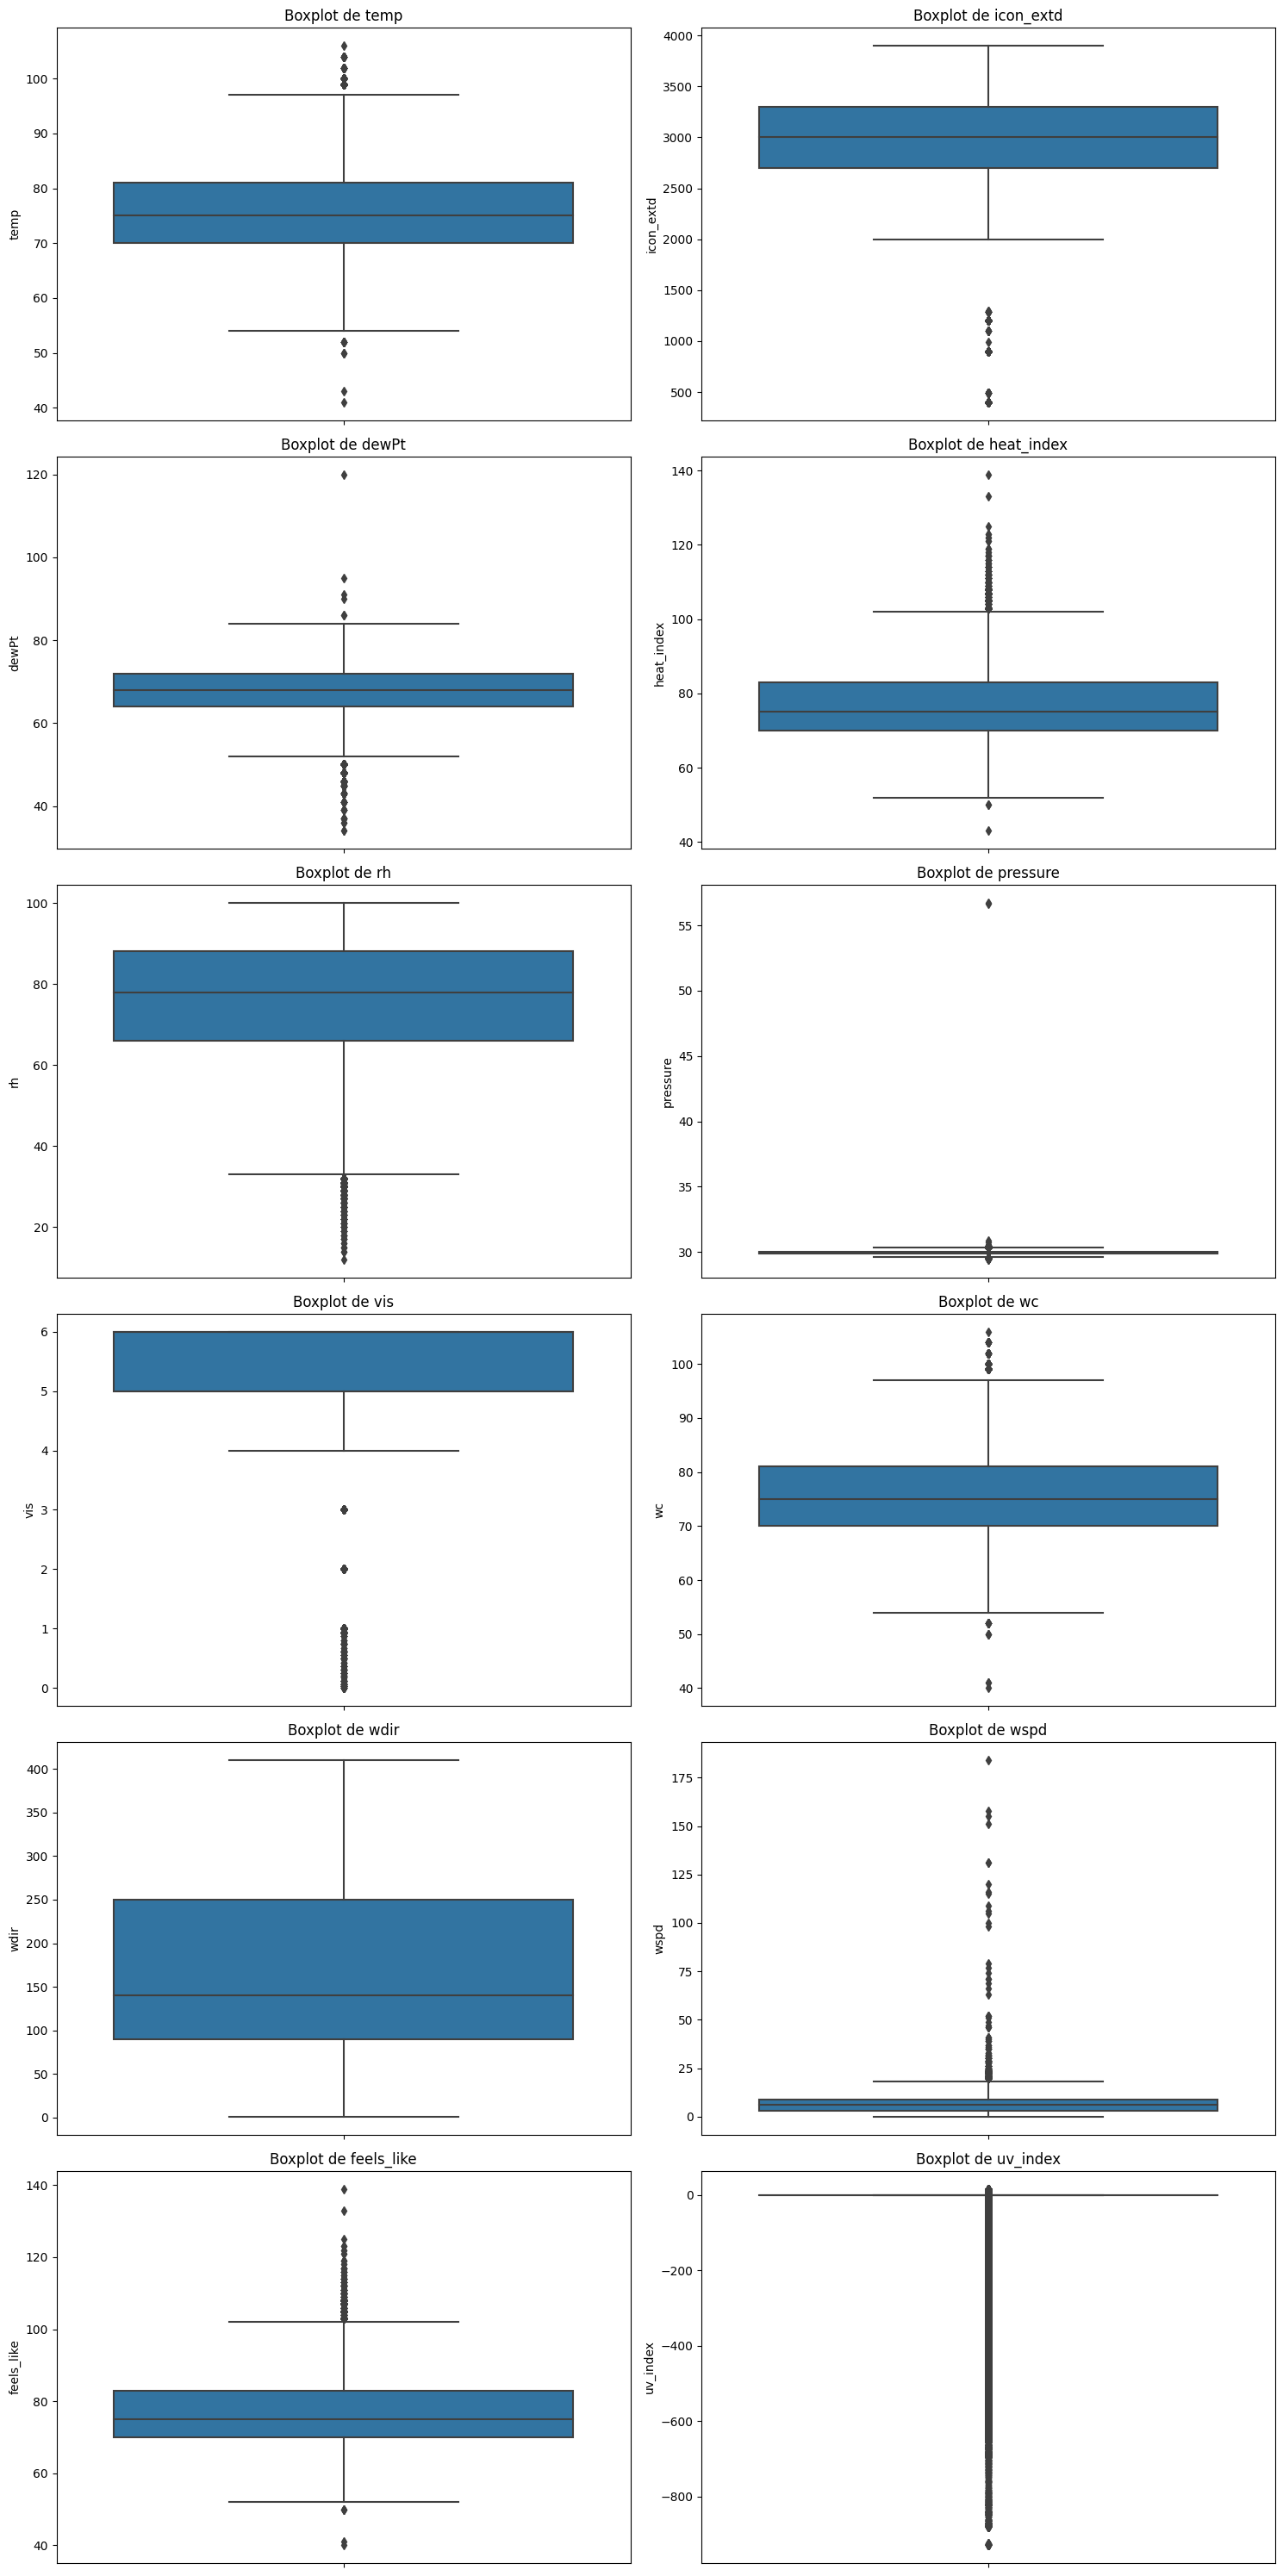

In [37]:
plot_boxplots(df_mice)

In [38]:
import pandas as pd
import numpy as np

def detect_outliers_tukey(df):
    outliers = pd.DataFrame(columns=['column', 'index', 'outlier_value'])
    
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calcular Q1 (percentil 25) y Q3 (percentil 75)
        Q1 = np.percentile(df[column].dropna(), 25)
        Q3 = np.percentile(df[column].dropna(), 75)
        
        # Calcular IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Definir límites superior e inferior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_values = df.loc[outlier_indices, column]
        
        # Crear un DataFrame temporal con los outliers detectados
        temp_outliers = pd.DataFrame({'column': column, 'index': outlier_indices, 'outlier_value': outlier_values})
        
        # Concatenar con el DataFrame principal de outliers
        outliers = pd.concat([outliers, temp_outliers], ignore_index=True)
    
    return outliers


In [39]:
outliers = detect_outliers_tukey(df_mice)

C:\Users\manug\AppData\Local\Temp\ipykernel_16388\206343886.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([outliers, temp_outliers], ignore_index=True)


In [40]:
outliers

column               index  outlier_value
0           temp 1999-01-04 19:00:00          100.0
1           temp 1999-02-07 14:00:00           99.0
2           temp 1999-02-07 15:00:00           99.0
3           temp 1999-02-08 14:00:00           99.0
4           temp 1999-02-08 15:00:00           99.0
...          ...                 ...            ...
133410  uv_index 2024-07-26 12:00:00            6.0
133411  uv_index 2024-07-26 13:00:00            6.0
133412  uv_index 2024-07-26 14:00:00            4.0
133413  uv_index 2024-07-26 15:00:00            2.0
133414  uv_index 2024-07-26 16:00:00            1.0

[133415 rows x 3 columns]

In [41]:
outliers[outliers.column == 'temp'].outlier_value.sort_values(ascending = True)

18      41.0
46      43.0
16      50.0
7       50.0
8       50.0
       ...  
262    104.0
340    104.0
261    104.0
82     104.0
582    106.0
Name: outlier_value, Length: 616, dtype: float64

## Detección de tendencia y estacionalidad

In [42]:
df_mensual = df_mice.resample('M').mean()

In [43]:
df_mensual

temp    icon_extd      dewPt  heat_index         rh  \
1999-01-31  81.470430  2934.630376  77.241935   88.693548  87.763441   
1999-02-28  81.848214  2942.976190  76.346726   88.105655  84.882440   
1999-03-31  79.963710  2929.692204  76.252688   85.288978  89.220430   
1999-04-30  75.877778  2946.363889  71.370833   78.059722  86.862500   
1999-05-31  71.380376  3020.416667  66.403226   71.915323  85.579301   
...               ...          ...        ...         ...        ...   
2024-03-31  79.987903  2819.955645  72.474462   83.690860  78.903226   
2024-04-30  78.034722  3140.572222  69.141667   79.912500  74.931944   
2024-05-31  77.114247  3010.645161  67.330645   78.405914  73.823925   
2024-06-30  73.404167  3114.095833  63.209722   73.695833  73.138889   
2024-07-31  70.566828  2845.877617  62.914654   70.702093  78.032206   

             pressure       vis         wc        wdir      wspd  feels_like  \
1999-01-31  29.837043  5.214960  81.473118  155.268817  5.602151   88.693548   
1999-02-28  29.869375  5.270268  81.869048  153.885417  5.177083   88.105655   
1999-03-31  29.865417  5.191411  79.963710  169.750000  5.592742   85.288978   
1999-04-30  30.022708  5.256944  75.872222  160.819444  5.279167   78.059722   
1999-05-31  30.036250  4.977151  71.377688  190.442204  5.185484   71.911290   
...               ...       ...        ...         ...       ...         ...   
2024-03-31  29.886586  5.208159  79.987903  167.849462  6.981183   83.690860   
2024-04-30  29.932875  5.654167  78.034722  144.513889  6.327778   79.912500   
2024-05-31  29.961062  5.400444  77.114247  166.276882  5.643817   78.405914   
2024-06-30  30.029167  5.311264  73.404167  152.319444  4.936111   73.695833   
2024-07-31  30.116570  4.809179  70.566828  202.866345  5.420290   70.702093   

              uv_index  
1999-01-31 -121.068548  
1999-02-28 -111.498512  
1999-03-31 -100.893817  
1999-04-30  -65.868056  
1999-05-31  -41.231183  
...                ...  
2024-03-31    1.965054  
2024-04-30    1.591667  
2024-05-31    1.095430  
2024-06-30    0.990278  
2024-07-31    0.867955  

[307 rows x 12 columns]

### Variable temp

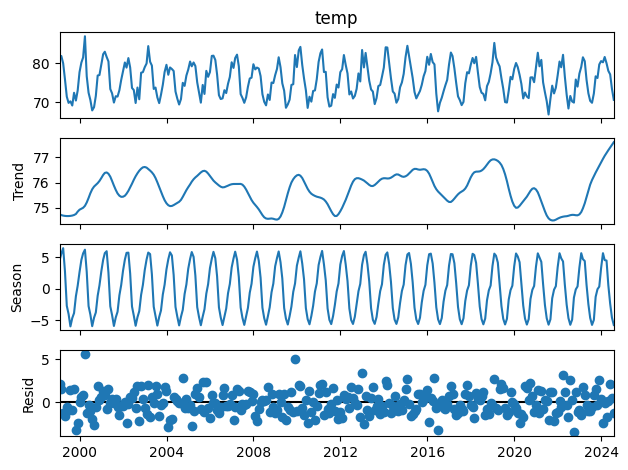

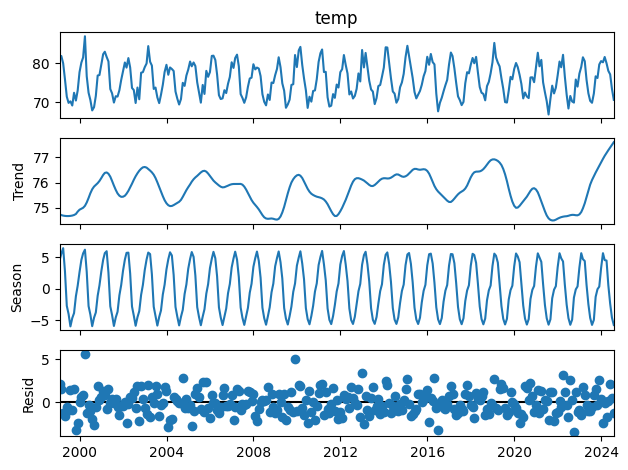

In [44]:
from statsmodels.tsa.seasonal import STL

temp_stl = STL(df_mensual.temp, seasonal=25).fit()

temp_stl.plot()

In [45]:
temp_stl.resid.mean()

-0.0033484472921651185

### Variabel dewPt

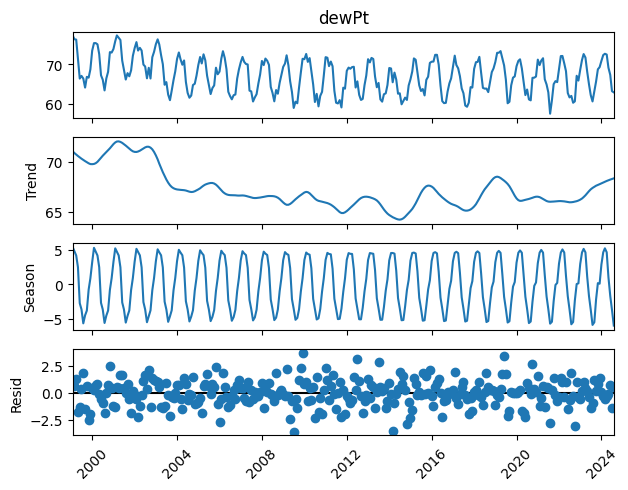

In [46]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

dewpt_stl = STL(df_mensual.dewPt, seasonal=25).fit()
fig = dewpt_stl.plot()


for ax in fig.get_axes():
    plt.sca(ax)
    plt.xticks(rotation=45) 

plt.show()

In [47]:
dewpt_stl.resid.mean()

-0.0053227131912145335

### Variable pressure

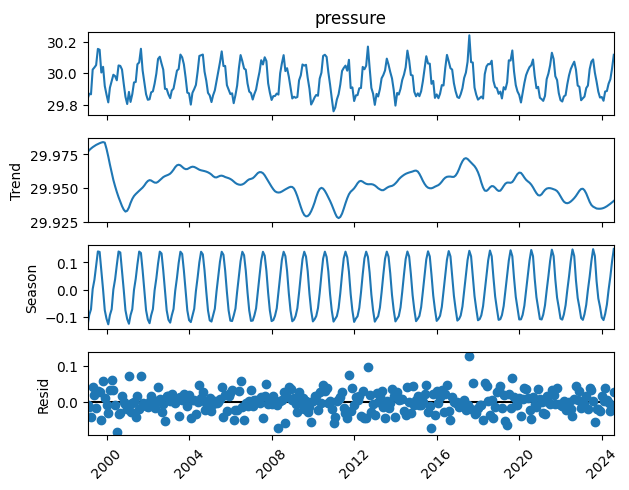

In [48]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

pressure_stl = STL(df_mensual.pressure, seasonal=25).fit()
fig = pressure_stl.plot()


for ax in fig.get_axes():
    plt.sca(ax)
    plt.xticks(rotation=45) 

plt.show()

## Grafico estacional

In [49]:
df_mensual['mes'] = df_mensual.index.month
df_mensual['año'] = df_mensual.index.year

### Variable temp

In [50]:
df_mensual_pivot_temp = df_mensual.pivot(index = 'mes', columns='año', values='temp')
df_mensual_pivot_temp

año       1999       2000       2001       2002       2003       2004  \
mes                                                                     
1    81.470430  80.147849  82.307796  80.180108  79.926075  77.013441   
2    81.848214  81.462644  82.944940  78.854167  84.391369  78.896552   
3    79.963710  86.928763  81.596774  81.315860  80.375000  78.498656   
4    75.877778  76.636111  80.443056  78.900000  79.381944  77.983333   
5    71.380376  72.397849  73.348118  73.619624  73.372312  72.709677   
6    69.783333  70.536111  72.238889  73.083333  73.722222  70.897222   
7    70.181452  67.842742  69.862903  69.756720  71.186828  69.361559   
8    69.104839  68.676075  71.494624  73.728495  69.721774  70.767473   
9    72.387500  71.577778  71.404167  70.712500  71.877778  74.943056   
10   70.383065  76.823925  73.037634  77.544355  74.450269  74.158602   
11   72.972222  76.950000  75.663889  77.690278  77.731944  76.811111   
12   77.694892  79.599462  77.932796  78.966398  79.581989  78.357527   

año       2005       2006       2007       2008  ...       2015       2016  \
mes                                              ...                         
1    80.420699  81.866935  78.772849  78.400538  ...  84.467742  79.581989   
2    79.193452  81.930060  81.319940  78.869253  ...  81.858631  82.375000   
3    80.178763  80.833333  82.194892  78.611559  ...  78.895161  80.280914   
4    79.263889  77.081944  79.193056  76.677778  ...  76.181944  79.687500   
5    75.052419  71.764785  72.034946  71.997312  ...  72.581989  72.157258   
6    72.473611  70.770833  71.066667  70.062500  ...  70.934722  67.608333   
7    69.844086  70.947581  69.797043  69.149194  ...  71.918011  69.798387   
8    74.399194  73.047043  71.208333  71.952957  ...  72.865591  71.108871   
9    72.083333  72.309722  73.915278  70.533333  ...  74.427778  72.756944   
10   78.029570  74.728495  76.061828  75.020161  ...  76.625000  74.330645   
11   76.483333  76.448611  76.272222  74.888889  ...  77.961111  75.691667   
12   77.720430  80.233871  79.727151  76.923387  ...  81.649194  79.663978   

año       2017       2018       2019       2020       2021       2022  \
mes                                                                     
1    82.739247  81.338710  85.212366  80.045699  82.685484  80.426075   
2    81.830357  79.976190  81.501488  78.979885  79.191964  78.940476   
3    78.668011  81.625000  80.145161  76.982527  80.852151  82.149194   
4    74.955556  77.665278  79.166667  74.654167  75.063889  76.587500   
5    71.458333  73.850806  76.071237  70.923387  72.485215  71.891129   
6    70.515278  72.401389  73.431944  72.462500  70.200000  68.331944   
7    69.202957  72.091398  69.987903  71.419355  66.790323  71.561828   
8    70.037634  70.438172  69.865591  71.018817  70.813172  70.147849   
9    74.840278  74.091667  72.879167  76.326389  74.215278  69.852778   
10   77.678763  75.198925  76.479839  76.360215  72.215054  75.788978   
11   77.387500  77.381944  75.844444  75.104167  73.687500  73.966667   
12   79.602151  80.216398  78.489247  78.939516  76.896505  77.309140   

año       2023       2024  
mes                        
1    79.049731  80.220430  
2    81.516369  81.591954  
3    80.509409  79.987903  
4    75.718056  78.034722  
5    72.244624  77.114247  
6    70.313889  73.404167  
7    69.806452  70.566828  
8    72.189516        NaN  
9    76.620833        NaN  
10   76.186828        NaN  
11   79.675000        NaN  
12   80.540323        NaN  

[12 rows x 26 columns]

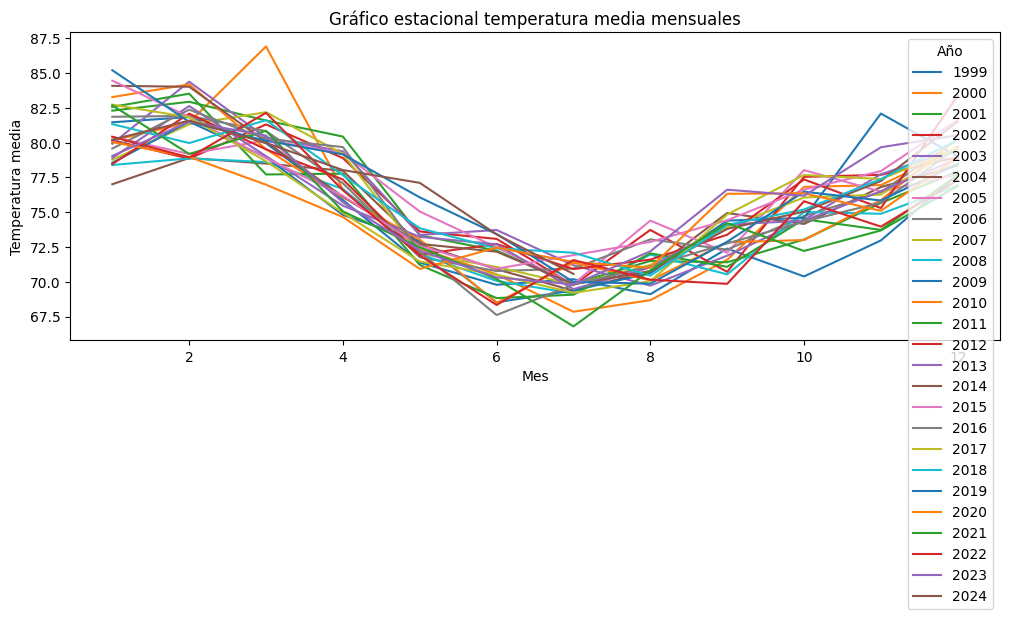

In [51]:
df_mensual_pivot_temp.plot(figsize = (12, 4))
plt.title('Gráfico estacional temperatura media mensuales')
plt.xlabel('Mes')
plt.ylabel('Temperatura media')
plt.legend(title='Año')
plt.show()

### Variable dewPt

In [52]:
df_mensual_pivot_dewpt = df_mensual.pivot(index = 'mes', columns='año', values='dewPt')
df_mensual_pivot_dewpt

año       1999       2000       2001       2002       2003       2004  \
mes                                                                     
1    77.241935  75.356183  75.860215  75.618280  76.314516  72.998656   
2    76.346726  75.370690  77.308036  73.483631  75.022321  71.275862   
3    76.252688  75.057796  76.708333  74.159946  72.330645  69.895161   
4    71.370833  72.586111  76.151389  73.491667  70.044444  70.983333   
5    66.403226  67.233871  70.935484  69.938172  64.841398  65.553763   
6    67.077778  66.113889  68.619444  69.451389  65.504167  62.788889   
7    66.407258  63.411290  66.155914  66.467742  62.352151  61.556452   
8    64.118280  66.462366  67.771505  69.120968  60.939516  62.110215   
9    66.843056  68.106944  66.976389  66.419444  63.347222  64.776389   
10   66.625000  73.091398  68.483871  71.802419  66.000000  65.088710   
11   68.731944  72.973611  72.129167  73.154167  68.219444  67.148611   
12   73.452957  73.876344  74.095430  75.081989  71.357527  69.837366   

año       2005       2006       2007       2008  ...       2015       2016  \
mes                                              ...                         
1    71.856183  71.443548  71.872312  69.809140  ...  68.209677  70.698925   
2    70.221726  73.322917  70.641369  71.459770  ...  71.497024  72.397989   
3    72.530914  71.604839  70.091398  70.911290  ...  71.150538  72.407258   
4    71.023611  68.759722  69.965278  69.862500  ...  67.904167  69.915278   
5    67.133065  63.065860  63.354839  64.291667  ...  64.689516  64.641129   
6    64.877778  61.979167  63.161111  62.800000  ...  63.265278  60.700000   
7    62.489247  61.153226  60.604839  60.643817  ...  63.751344  60.192204   
8    64.006720  62.198925  61.643817  63.500000  ...  62.138441  60.264785   
9    64.673611  62.369444  62.456944  62.569444  ...  66.083333  63.111111   
10   69.151882  66.408602  65.174731  65.331989  ...  66.879032  65.196237   
11   67.490278  68.708333  67.437500  67.316667  ...  70.365278  66.451389   
12   68.158602  70.510753  70.852151  69.356183  ...  70.668011  69.284946   

año       2017       2018       2019       2020       2021       2022  \
mes                                                                     
1    72.190860  70.545699  72.909946  70.872312  69.806452  72.083333   
2    69.837798  70.607143  72.921131  71.270115  70.928571  72.114583   
3    68.989247  71.891129  73.340054  68.989247  71.544355  70.252688   
4    67.019444  67.905556  71.556944  65.734722  66.219444  68.270833   
5    63.911290  64.055108  69.708333  62.220430  64.905914  62.743280   
6    62.698611  63.858333  66.148611  63.636111  62.916667  61.643056   
7    59.588710  63.869624  60.162634  61.129032  57.525538  62.016129   
8    59.271505  62.981183  60.536290  60.897849  60.908602  60.291667   
9    60.304167  65.472222  64.694444  66.586111  64.995833  60.645833   
10   64.245968  68.037634  66.631720  66.633065  65.754032  67.108871   
11   64.122222  68.966667  66.941667  66.913889  65.511111  65.887500   
12   68.868280  70.599462  69.524194  71.192204  68.713710  68.634409   

año       2023       2024  
mes                        
1    71.112903  72.338710  
2    72.596726  72.669540  
3    71.713710  72.474462  
4    68.152778  69.141667  
5    64.955645  67.330645  
6    62.233333  63.209722  
7    60.622312  62.914654  
8    63.200269        NaN  
9    65.658333        NaN  
10   68.741935        NaN  
11   69.287500        NaN  
12   70.865591        NaN  

[12 rows x 26 columns]

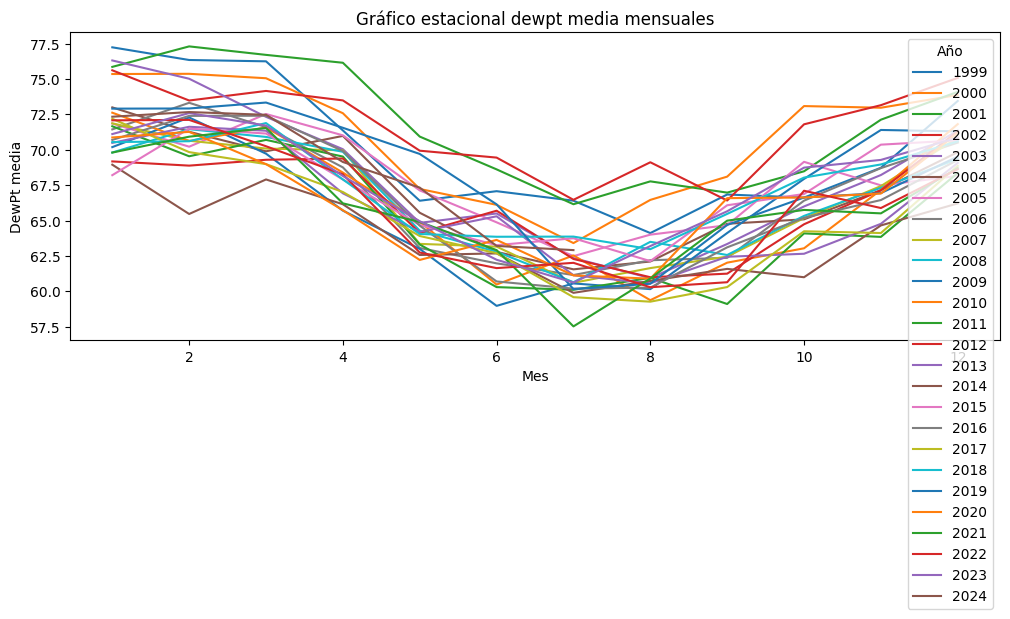

In [53]:
df_mensual_pivot_dewpt.plot(figsize = (12, 4))
plt.title('Gráfico estacional dewpt media mensuales')
plt.xlabel('Mes')
plt.ylabel('DewPt media')
plt.legend(title='Año')
plt.show()

### Extracción del componente estacional

### Variable temp

In [54]:
from statsmodels.tsa.seasonal import STL

temp_stl = STL(df_mensual.temp, seasonal=25).fit()

temp_seas = temp_stl.seasonal.to_frame('temp')
temp_seas

temp
1999-01-31  4.584086
1999-02-28  5.600079
1999-03-31  6.479810
1999-04-30  2.823712
1999-05-31 -2.720528
...              ...
2024-03-31  4.505136
2024-04-30  0.604086
2024-05-31 -2.367376
2024-06-30 -4.595936
2024-07-31 -5.771444

[307 rows x 1 columns]

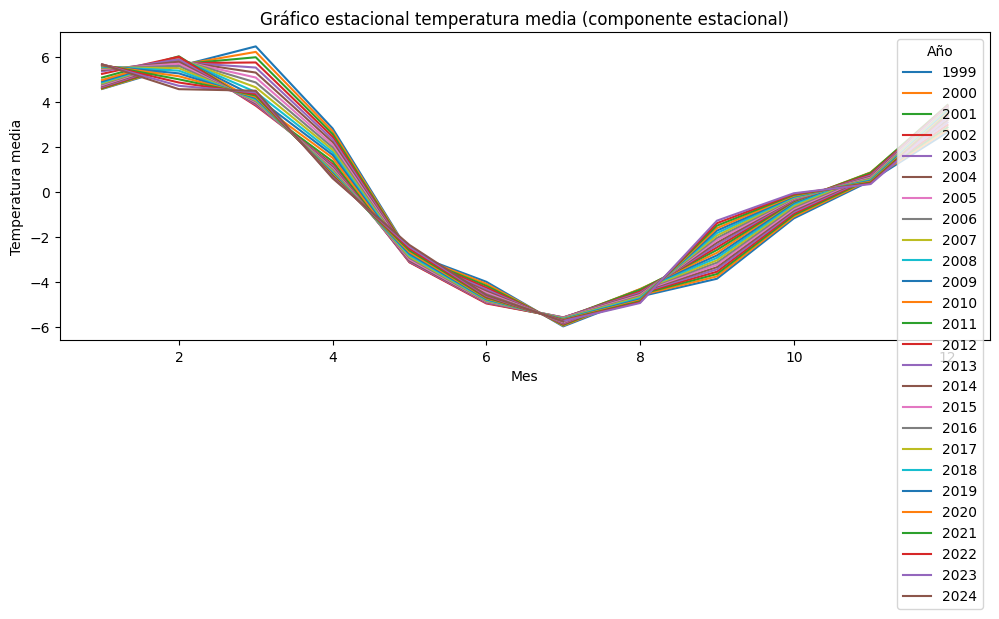

In [55]:
temp_seas_mensual = temp_seas.resample('M').mean()

temp_seas_mensual['mes'] = temp_seas_mensual.index.month
temp_seas_mensual['año'] = temp_seas_mensual.index.year

temp_seas_mensual_pivot = temp_seas_mensual.pivot(index='mes', columns='año', values='temp')
temp_seas_mensual_pivot.plot(figsize=(12,4))
plt.title('Gráfico estacional temperatura media (componente estacional)')
plt.xlabel('Mes')
plt.ylabel('Temperatura media')
plt.legend(title = 'Año')
plt.show()

### Variable dewPt

In [56]:
from statsmodels.tsa.seasonal import STL
dewpt_stl= STL(df_mensual.dewPt, seasonal=25).fit()
dewpt_seas = dewpt_stl.seasonal.to_frame('dewpt')

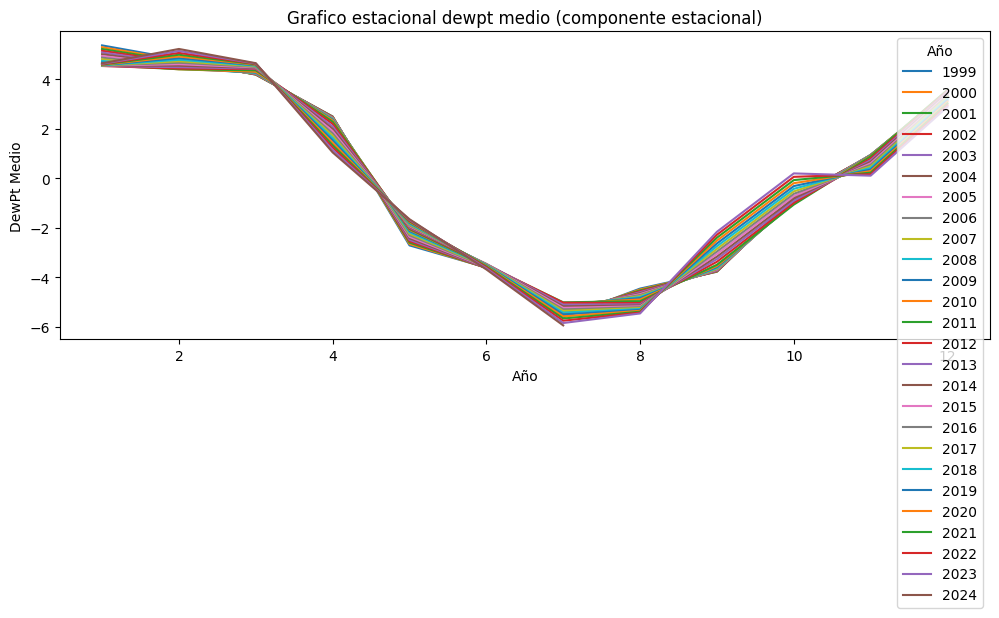

In [57]:
dewpt_seas['mes'] = dewpt_seas.index.month
dewpt_seas['año'] = dewpt_seas.index.year

dewpt_seas_pivot = dewpt_seas.pivot(index= 'mes', columns='año', values='dewpt')

dewpt_seas_pivot.plot(figsize = (12, 4))
plt.title('Grafico estacional dewpt medio (componente estacional)')
plt.xlabel('Año')
plt.ylabel('DewPt Medio')
plt.legend(title= 'Año')
plt.show()

## Analisis de correlación

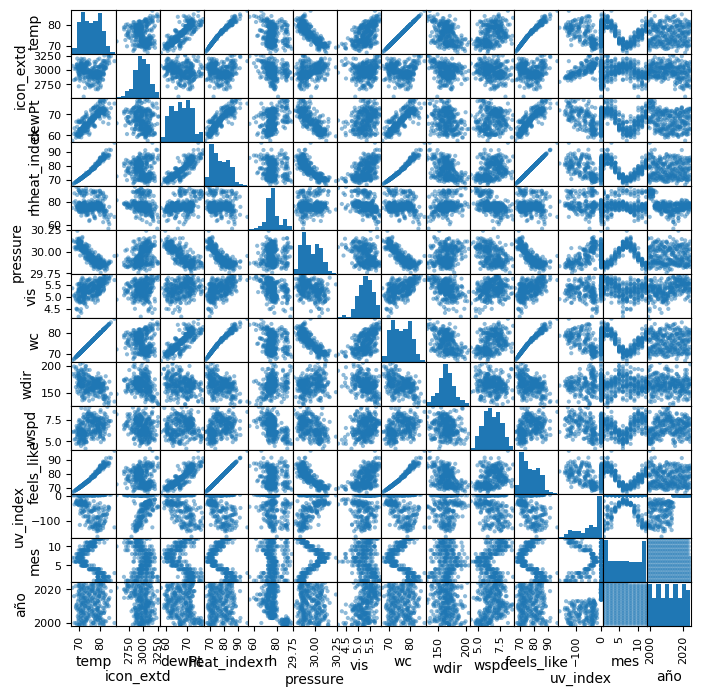

In [58]:
pd.plotting.scatter_matrix(df_mensual, figsize=(8,8));

In [59]:
df_mensual.corr()

temp  icon_extd     dewPt  heat_index        rh  pressure  \
temp        1.000000  -0.023627  0.839500    0.989254 -0.206527 -0.858148   
icon_extd  -0.023627   1.000000 -0.187420   -0.021885 -0.257526  0.330694   
dewPt       0.839500  -0.187420  1.000000    0.876091  0.354978 -0.786331   
heat_index  0.989254  -0.021885  0.876091    1.000000 -0.122543 -0.838346   
rh         -0.206527  -0.257526  0.354978   -0.122543  1.000000  0.069762   
pressure   -0.858148   0.330694 -0.786331   -0.838346  0.069762  1.000000   
vis         0.544288   0.129842  0.283552    0.519108 -0.427162 -0.385008   
wc          0.999999  -0.023585  0.839501    0.989257 -0.206521 -0.858120   
wdir       -0.434131  -0.260952 -0.259967   -0.418017  0.262861  0.218542   
wspd        0.363259  -0.216315  0.070728    0.308514 -0.524473 -0.461139   
feels_like  0.989326  -0.021801  0.875403    0.999970 -0.123923 -0.838075   
uv_index   -0.287011   0.056982 -0.421617   -0.318451 -0.265797  0.379287   
mes        -0.359254  -0.230079 -0.358762   -0.388191 -0.029955  0.147027   
año         0.017338  -0.214395 -0.245552   -0.037072 -0.499444 -0.038879   

                 vis        wc      wdir      wspd  feels_like  uv_index  \
temp        0.544288  0.999999 -0.434131  0.363259    0.989326 -0.287011   
icon_extd   0.129842 -0.023585 -0.260952 -0.216315   -0.021801  0.056982   
dewPt       0.283552  0.839501 -0.259967  0.070728    0.875403 -0.421617   
heat_index  0.519108  0.989257 -0.418017  0.308514    0.999970 -0.318451   
rh         -0.427162 -0.206521  0.262861 -0.524473   -0.123923 -0.265797   
pressure   -0.385008 -0.858120  0.218542 -0.461139   -0.838075  0.379287   
vis         1.000000  0.544272 -0.405309  0.263853    0.519511  0.195510   
wc          0.544272  1.000000 -0.434153  0.363248    0.989329 -0.286982   
wdir       -0.405309 -0.434153  1.000000 -0.156375   -0.418939  0.020098   
wspd        0.263853  0.363248 -0.156375  1.000000    0.309237 -0.259568   
feels_like  0.519511  0.989329 -0.418939  0.309237    1.000000 -0.318098   
uv_index    0.195510 -0.286982  0.020098 -0.259568   -0.318098  1.000000   
mes        -0.196362 -0.359223  0.056323  0.289942   -0.388089 -0.041821   
año         0.406156  0.017337 -0.086395  0.194321   -0.036206  0.681229   

                 mes       año  
temp       -0.359254  0.017338  
icon_extd  -0.230079 -0.214395  
dewPt      -0.358762 -0.245552  
heat_index -0.388191 -0.037072  
rh         -0.029955 -0.499444  
pressure    0.147027 -0.038879  
vis        -0.196362  0.406156  
wc         -0.359223  0.017337  
wdir        0.056323 -0.086395  
wspd        0.289942  0.194321  
feels_like -0.388089 -0.036206  
uv_index   -0.041821  0.681229  
mes         1.000000 -0.028444  
año        -0.028444  1.000000

## Autocorrelación

### Variable temp

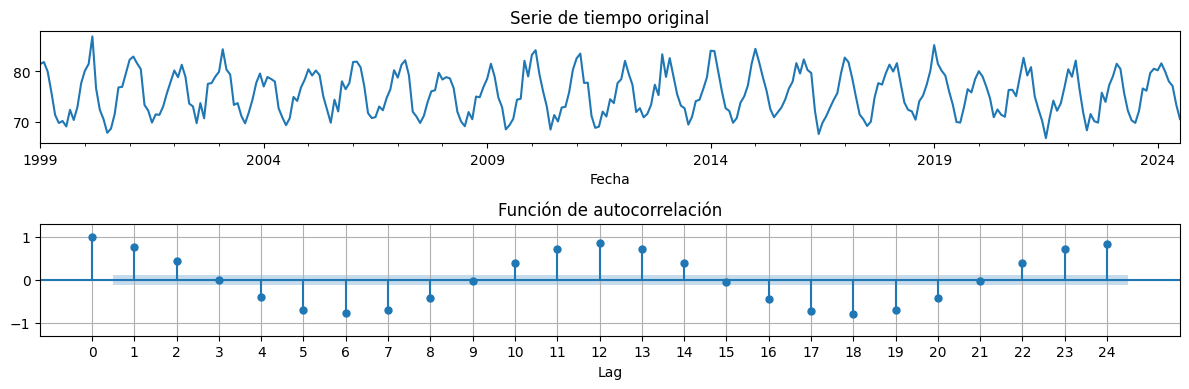

In [60]:
import statsmodels.graphics.tsaplots as tsaplots

fig, ax = plt.subplots(2,1,figsize=(12,4))

df_mensual['temp'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de tiempo original')

lags = 24
tsaplots.plot_acf(df_mensual['temp'].to_numpy(), adjusted=True, lags = lags, alpha=0.05, bartlett_confint=False, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,lags+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

### Variable dewPt

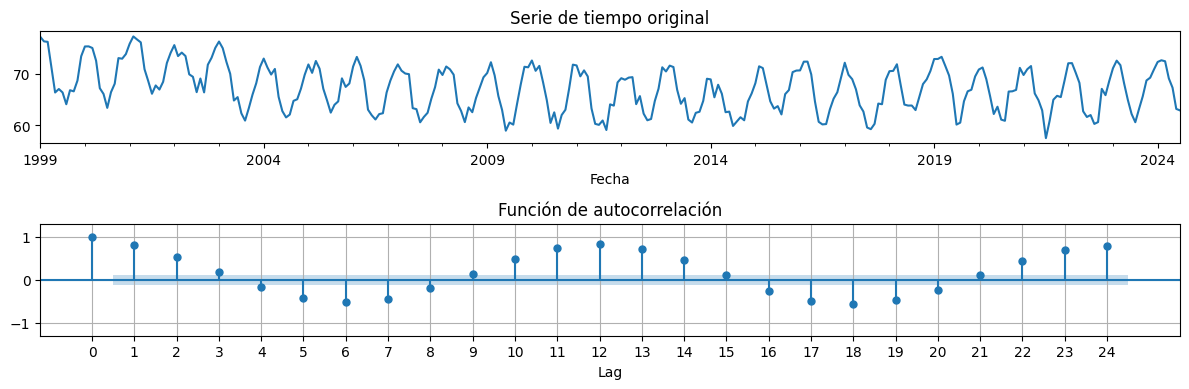

In [61]:
import statsmodels.graphics.tsaplots as tsaplots

fig, ax = plt.subplots(2,1,figsize=(12,4))

df_mensual['dewPt'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de tiempo original')

lags = 24
tsaplots.plot_acf(df_mensual['dewPt'].to_numpy(), adjusted=True, lags = lags, alpha=0.05, bartlett_confint=False, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,lags+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

### Variable pressure

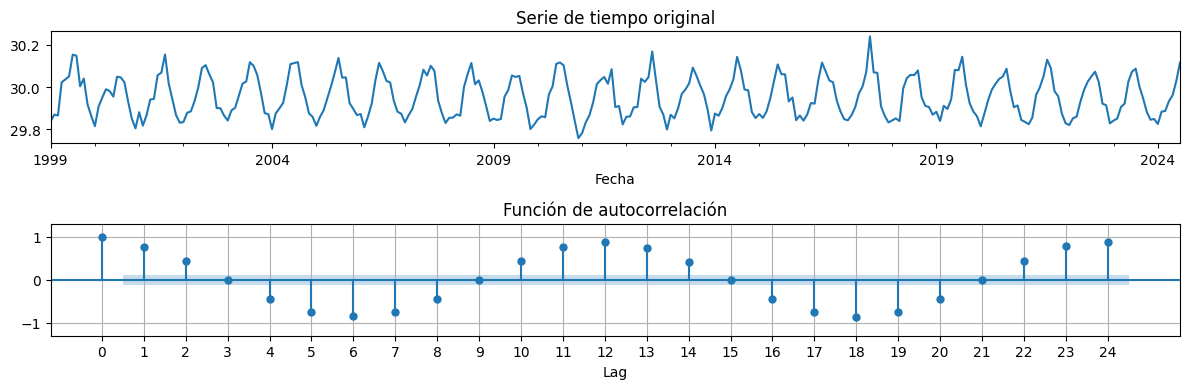

In [62]:
import statsmodels.graphics.tsaplots as tsaplots

fig, ax = plt.subplots(2,1,figsize=(12,4))

df_mensual['pressure'].plot(ax=ax[0])
ax[0].set_xlabel('Fecha')
ax[0].set_title('Serie de tiempo original')

lags = 24
tsaplots.plot_acf(df_mensual['pressure'].to_numpy(), adjusted=True, lags = lags, alpha=0.05, bartlett_confint=False, ax=ax[1])
ax[1].set_xlabel('Lag')
ax[1].set_xticks(range(0,lags+1))
ax[1].set_title('Función de autocorrelación')
ax[1].set_ylim([-1.3, 1.3])
ax[1].grid()
fig.tight_layout()

## Prueba de estacionalidad con Dickey-Fuller

In [74]:
from statsmodels.tsa.stattools import adfuller

def verificar_estacionalidad(serie):
    adf = adfuller(serie)

    p = adf[1]

    if p < 0.05:
        print(f'La serie es estacionaria porque p={p:.2f} < 0.05')
    else:
        print(f'La serie NO es estacioaria porque p={p:.2f} >= 0.05')

In [75]:
for columna in df_mensual.columns:
    print(f'Verificar la estacionalidad de: {columna}')
    verificar_estacionalidad(df_mensual[columna])
    print()

Verificar la estacionalidad de: temp
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: icon_extd
La serie NO es estacioaria porque p=0.47 >= 0.05

Verificar la estacionalidad de: dewPt
La serie NO es estacioaria porque p=0.06 >= 0.05

Verificar la estacionalidad de: heat_index
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: rh
La serie NO es estacioaria porque p=0.13 >= 0.05

Verificar la estacionalidad de: pressure
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: vis
La serie NO es estacioaria porque p=0.18 >= 0.05

Verificar la estacionalidad de: wc
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: wdir
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: wspd
La serie NO es estacioaria porque p=0.38 >= 0.05

Verificar la estacionalidad de: feels_like
La serie es estacionaria porque p=0.00 < 0.05

Verificar la estacionalidad de: uv_index
La 